In [11]:
import numpy as np
import cv2
from os import listdir
import tensorflow as tf
import pickle
import pandas as pd
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.python.keras.layers.core import Activation, Flatten, Dropout, Dense, Reshape
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
from glob import glob
%matplotlib inline

In [12]:
imagePatches_0 = glob('data/0/*.png', recursive=True)
imagePatches_1 = glob('data/1/*.png', recursive=True)
len(imagePatches_0)

7160

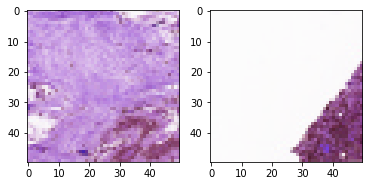

(50, 50, 3)


In [13]:
img_0=cv2.imread(imagePatches_0[0])
img_1=cv2.imread(imagePatches_1[0])
plt.subplot(1,2,1)
plt.imshow(img_0)
plt.subplot(1,2,2)
plt.imshow(img_1)
plt.show()
print(img.shape)

In [17]:
images=[]
labels=[]
for i in imagePatches_0:
    label=0
    img=cv2.imread(i)
    images.append(img)
    labels.append(label)
for i in imagePatches_1:
    label=1
    img=cv2.imread(i)
    images.append(img)
    labels.append(label)

In [18]:
df = pd.DataFrame()
df["images"]=images
df["labels"]=labels

In [19]:
df

,images,labels
0,"[[[206, 164, 226], [196, 154, 224], [211, 175,...",0
1,"[[[197, 150, 219], [201, 158, 217], [205, 173,...",0
2,"[[[249, 245, 248], [248, 246, 248], [253, 246,...",0
3,"[[[249, 247, 249], [249, 247, 249], [249, 247,...",0
4,"[[[237, 231, 241], [245, 242, 246], [235, 222,...",0
...,...,...
9995,"[[[232, 225, 237], [197, 174, 226], [210, 191,...",1
9996,"[[[238, 232, 239], [225, 218, 234], [204, 178,...",1
9997,"[[[119, 73, 98], [144, 108, 142], [128, 86, 13...",1
9998,"[[[156, 99, 171], [137, 80, 145], [118, 61, 10...",1
